In [ ]:
# Importing necessary modules

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

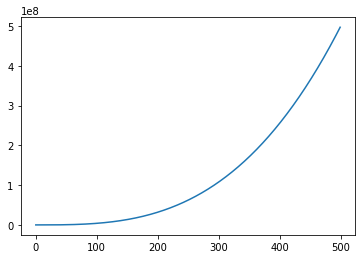

In [ ]:
import tensorflow as tf
x=tf.range(0,500,1)
y=4*(x**3) + 2*x + 150
plt.plot(x,y)

In [ ]:
length=len(x)*0.8
length

400.0

In [ ]:
# Finding the max in the x and y respectively

max_x=np.max(x)
max_y=np.max(y)

# Splitting the data into train and test sets

x_train=x[:400]
x_test=x[400:]

y_train=y[:400]
y_test=y[400:]


In [ ]:
# Normalizing the entire data

x_normalized = x/max(x)
y_normalized = y/max(y)

In [ ]:
# Splitting the normalized data into training and testing sets

x_train_normalized=x_normalized[:400]
y_train_normalized=y_normalized[:400]
x_test_normalized=x_normalized[400:]
y_test_normalized=y_normalized[400:]

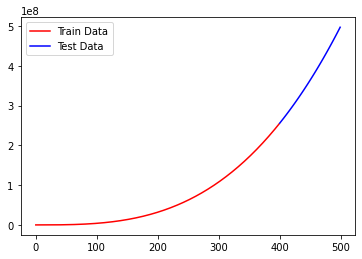

In [ ]:
# General plotting of the function

plt.plot(x_train,y_train,c='red',label='Train Data')
plt.plot(x_test,y_test,c='blue',label='Test Data')
plt.legend()

In [ ]:
# Creating function for creating checkpoints for the models
# path = './checkpoints/model0.ckpt'
# def model_cp_create(model_name):
#   return tf.keras.callbacks.ModelCheckpoint(filepath=path,
#                                            monitor='loss',
#                                            save_best_only=True,
#                                            save_weights_only=True,
#                                            verbose=0)

def model_cp_create(model_name):
  return tf.keras.callbacks.ModelCheckpoint(filepath=f'Models/{model_name}',
                                           monitor='loss',
                                           save_best_only=True,
                                           save_weights_only=True,
                                           verbose=0)

# creating a tensorboard callback function

import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
# Training the model on x_train and x_test data which hasn't been normalized

model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model with mean squared error as the loss function and Adam optimizer
model_0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

# Train the model
histroy_0=model_0.fit(x_train, y_train, epochs=100, batch_size=32,
            callbacks=[create_tensorboard_callback("Trained_Models", "Model_0"),
                                   model_cp_create(model_name='model_0')])



Saving TensorBoard log files to: Trained_Models/Model_0/20230323-111216
Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 9280657674993664.0000
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 9280637273899008.0000
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 9280609356611584.0000
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 9280571775647744.0000
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 9280524531007488.0000
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 9280462253981696.0000
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 9280384944570368.0000
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 9280287234064384.0000
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 9280172343689216.0000
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss:

In [ ]:
y_pred_0=model_0.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
model_0.load_weights('Models/model_0')


In [ ]:
# Defining the function which will be used to plot the data

def plot_graph(x_train,y_train,x_test,y_test,y_pred):
  plt.plot(x_train,y_train,c='red',label='Train Data')
  plt.plot(x_test,y_test,c='blue',label='Test Data')
  plt.plot(x_test,y_pred,linestyle='dashed',c='green',label='Pred Data')
  plt.legend()

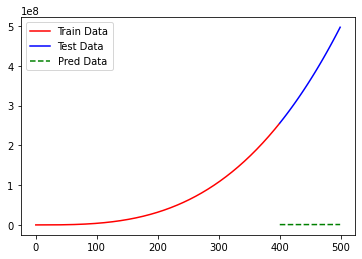

In [ ]:
# plotting the data obtained from model_0

plot_graph(x_train=x_train,
           y_train=y_train,
           x_test=x_test,
           y_test=y_test,
           y_pred=y_pred_0)

In [ ]:
# Training models with different configurations to get closer to the output

tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history_1=model_1.fit(tf.expand_dims(x_train_normalized,axis=-1),y_train_normalized, epochs=500,verbose=0,
            callbacks=[create_tensorboard_callback("Trained_Models", "Model_1"),
                                   model_cp_create(model_name='model_1')])

Saving TensorBoard log files to: Trained_Models/Model_1/20230323-111228


In [ ]:
model_1.load_weights('Models/model_1')

In [ ]:
y_preds_1=model_1.predict(x_test_normalized)

4/4 [==============================] - 0s 3ms/step


In [ ]:
# the reason for doing this is to scale the predicted data back to the original state
# we multiply the predicted data by the maximum value in the y to scale it

y_preds_1_extended=tf.math.multiply(y_preds_1,max_y)

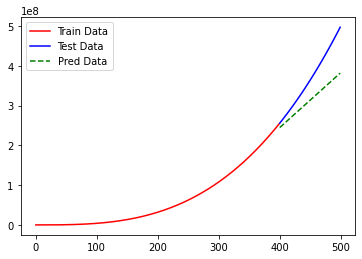

In [ ]:
plot_graph(x_train=x_train,
           y_train=y_train,
           x_test=x_test,
           y_test=y_test,
           y_pred=y_preds_1_extended)

**The above graph is a little far away from our output**

In [ ]:
# now creating another model

tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1],activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history_2=model_2.fit(tf.expand_dims(x_train_normalized,axis=-1),y_train_normalized, epochs=500,verbose=0,
            callbacks=[create_tensorboard_callback("Trained_Models", "Model_2"),
                                   model_cp_create(model_name='model_2')])

Saving TensorBoard log files to: Trained_Models/Model_2/20230323-111249


In [ ]:
model_2.load_weights('Models/model_2')

In [ ]:
y_preds_2=model_2.predict(x_test_normalized)

4/4 [==============================] - 0s 2ms/step


In [ ]:
y_preds_2_extended=tf.math.multiply(y_preds_2,max_y)

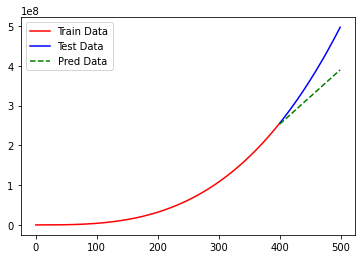

In [ ]:
plot_graph(x_train=x_train,
           y_train=y_train,
           x_test=x_test,
           y_test=y_test,
           y_pred=y_preds_2_extended)

**We need to further improve the model**

In [ ]:
# Now, training the model based on the normalized data

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_shape=[1],activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history_3=model_3.fit(tf.expand_dims(x_train_normalized,axis=-1),y_train_normalized, epochs=500,verbose=0,
            callbacks=[create_tensorboard_callback("Trained_Models", "Model_3"),
                                   model_cp_create(model_name='model_3')])

Saving TensorBoard log files to: Trained_Models/Model_3/20230323-111310


In [ ]:
model_3.load_weights('Models/model_3')

In [ ]:
y_preds_3=model_3.predict(x_test_normalized)
y_preds_3_extended=tf.math.multiply(y_preds_3,max_y)

4/4 [==============================] - 0s 2ms/step


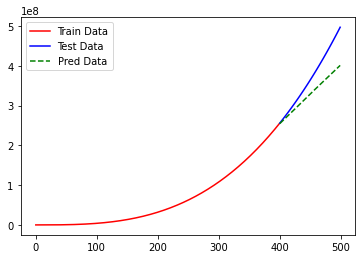

In [ ]:
plot_graph(x_train=x_train,
           y_train=y_train,
           x_test=x_test,
           y_test=y_test,
           y_pred=y_preds_3_extended)

In [ ]:
# Now, training the model based on the normalized data

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(256,input_shape=[1],activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history_4=model_4.fit(tf.expand_dims(x_train_normalized,axis=-1),y_train_normalized, epochs=500,verbose=0,
            callbacks=[create_tensorboard_callback("Trained_Models", "Model_4"),
                                   model_cp_create(model_name='model_4')])

Saving TensorBoard log files to: Trained_Models/Model_4/20230323-111332


In [ ]:
model_4.load_weights('Models/model_4')

In [ ]:
y_preds_4=model_4.predict(x_test_normalized)

4/4 [==============================] - 0s 2ms/step


In [ ]:
y_preds_4_extended = tf.math.multiply(y_preds_4,max_y)

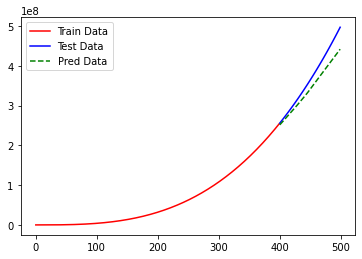

In [ ]:
plot_graph(x_train=x_train,
           y_train=y_train,
           x_test=x_test,
           y_test=y_test,
           y_pred=y_preds_4_extended)

In [ ]:
# building model 5 by increasing the layers

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(512,input_shape=[1],activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history_5=model_5.fit(tf.expand_dims(x_train_normalized,axis=-1),y_train_normalized, epochs=500,verbose=0,
            callbacks=[create_tensorboard_callback("Trained_Models", "Model_5"),
                                   model_cp_create(model_name='model_5')])

Saving TensorBoard log files to: Trained_Models/Model_5/20230323-111415


In [ ]:
model_5.load_weights('Models/model_5')

4/4 [==============================] - 0s 4ms/step


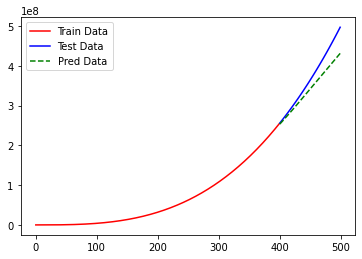

In [ ]:
y_preds_5=model_5.predict(x_test_normalized)
y_preds_5_extended=tf.math.multiply(y_preds_5,max_y)

# now plotting the graph we get

plot_graph(x_train=x_train,
           y_train=y_train,
           x_test=x_test,
           y_test=y_test,
           y_pred=y_preds_5_extended)

In [ ]:
# we have got closer to our required output

# model_6

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(512,input_shape=[1],activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history_6=model_6.fit(tf.expand_dims(x_train_normalized,axis=-1),y_train_normalized, epochs=1000,verbose=0,
            callbacks=[create_tensorboard_callback("Trained_Models", "Model_6"),
                                   model_cp_create(model_name='model_6')])

Saving TensorBoard log files to: Trained_Models/Model_6/20230323-111457


In [ ]:
model_6.load_weights('Models/model_6')

4/4 [==============================] - 0s 2ms/step


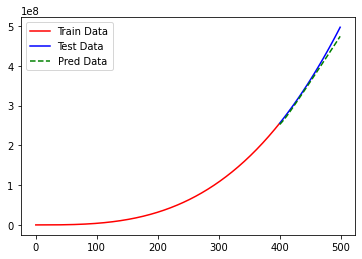

In [ ]:
y_preds_6=model_6.predict(x_test_normalized)
y_preds_6_extended=tf.math.multiply(y_preds_6,max_y)

# now plotting the graph we get

plot_graph(x_train=x_train,
           y_train=y_train,
           x_test=x_test,
           y_test=y_test,
           y_pred=y_preds_6_extended)

In [ ]:
# changing the activation function

tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(512,input_shape=[1],activation='tanh'),
    tf.keras.layers.Dense(256,activation='tanh'),
    tf.keras.layers.Dense(128,activation='tanh'),
    tf.keras.layers.Dense(64,activation='tanh'),
    tf.keras.layers.Dense(32,activation='tanh'),
    tf.keras.layers.Dense(16,activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
history_7=model_7.fit(tf.expand_dims(x_train_normalized,axis=-1),y_train_normalized, epochs=1000,verbose=0,
            callbacks=[create_tensorboard_callback("Trained_Models", "Model_7"),
                                   model_cp_create(model_name='model_7')])

Saving TensorBoard log files to: Trained_Models/Model_7/20230323-111547


In [ ]:
model_7.load_weights('Models/model_7')

4/4 [==============================] - 0s 3ms/step


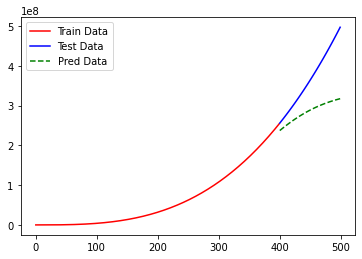

In [ ]:
y_preds_7=model_7.predict(x_test_normalized)
y_preds_7_extended=tf.math.multiply(y_preds_7,max_y)

# now plotting the graph we get

plot_graph(x_train=x_train,
           y_train=y_train,
           x_test=x_test,
           y_test=y_test,
           y_pred=y_preds_7_extended)

In [ ]:
model_7.evaluate(x_test_normalized,y_test_normalized)

4/4 [==============================] - 0s 4ms/step - loss: 0.1673 - mae: 0.1673


[0.16732670366764069, 0.16732670366764069]

In [ ]:
# building model_8 ---> changing the activation function

tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='gelu',input_shape=[1]),
    tf.keras.layers.Dense(64,activation='gelu'),
    tf.keras.layers.Dense(1,activation='linear'),
])

# Compile the model
model_8.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["mae"])

# Fit the model
history_8=model_8.fit(tf.expand_dims(x_train_normalized,axis=-1),y_train_normalized, epochs=500,verbose=0,
            callbacks=[create_tensorboard_callback("Trained_Models", "Model_8"),
                                   model_cp_create(model_name='model_8')])

Saving TensorBoard log files to: Trained_Models/Model_8/20230323-111710


In [ ]:
model_8.load_weights('Models/model_8')

4/4 [==============================] - 0s 3ms/step


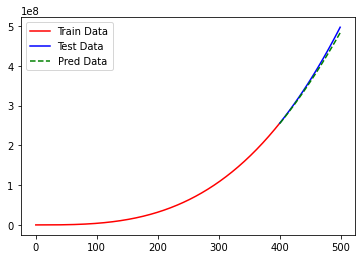

In [ ]:
# getting very close to our output with the activation function 'gelu' in our model
# also the layers in this model are less as compared to the one with the relu activation function

y_preds_8=model_8.predict(x_test_normalized)
y_preds_8_extended=tf.math.multiply(y_preds_8,max_y)

# now plotting the graph we get

plot_graph(x_train=x_train,
           y_train=y_train,
           x_test=x_test,
           y_test=y_test,
           y_pred=y_preds_8_extended)

In [ ]:
model_8.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 128)               256       
                                                                 
 dense_76 (Dense)            (None, 64)                8256      
                                                                 
 dense_77 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Visualizing the trained results on tensorboard

!tensorboard dev upload --logdir ./Trained_Models/ \
  --name "Comparing different Models used " \
  --description "The models are trained to learn the polynomial given" \
  --one_shot


2023-03-23 10:03:55.416093: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-23 10:03:55.416189: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-23 10:03:55.416208: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./Trained_Models/

This TensorBoar

The tensorboard link is [https://tensorboard.dev/experiment/xqJawum7R4WX7gjgHe6QoQ/](https://tensorboard.dev/experiment/xqJawum7R4WX7gjgHe6QoQ/)

In [ ]:
def plot_curves(model_history):
  loss=model_history.history['loss']
  epochs=range(len(model_history.history['loss']))
  plt.plot(epochs,loss,c='orange')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

In [ ]:
# Loss curves of some models :

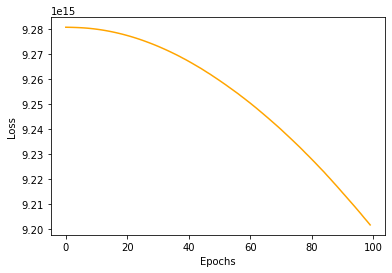

In [ ]:
plot_curves(histroy_0)

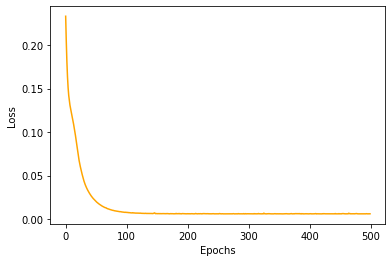

In [ ]:
plot_curves(history_1)

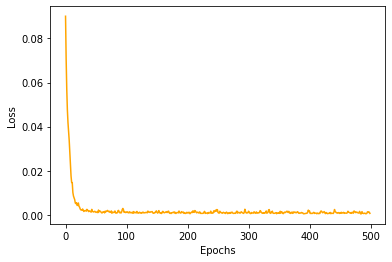

In [ ]:
plot_curves(history_2)

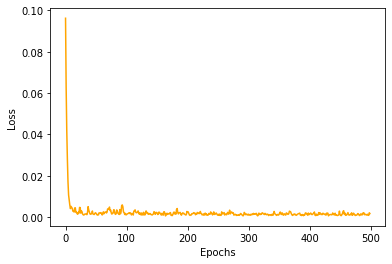

In [ ]:
plot_curves(history_3)

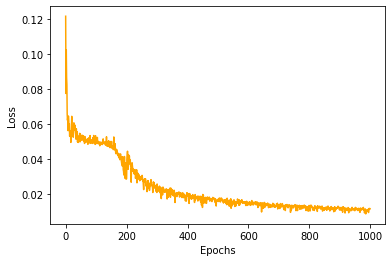

In [ ]:
plot_curves(history_7)

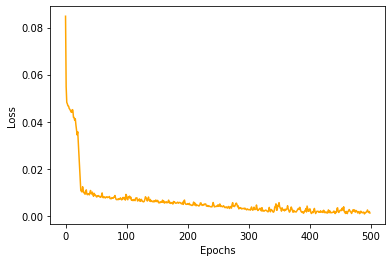

In [ ]:
plot_curves(history_8)

In [ ]:
!zip -r /content/Trained_Models.zip /content/Trained_Models

# converting the models folder into zip file and then downloading it
!zip -r /content/Models.zip /content/Models

  adding: content/Trained_Models/ (stored 0%)
  adding: content/Trained_Models/Model_5/ (stored 0%)
  adding: content/Trained_Models/Model_5/20230323-095529/ (stored 0%)
  adding: content/Trained_Models/Model_5/20230323-095529/train/ (stored 0%)
  adding: content/Trained_Models/Model_5/20230323-095529/train/events.out.tfevents.1679565329.f786e632cdab.132.5.v2 (deflated 85%)
  adding: content/Trained_Models/Model_6/ (stored 0%)
  adding: content/Trained_Models/Model_6/20230323-095605/ (stored 0%)
  adding: content/Trained_Models/Model_6/20230323-095605/train/ (stored 0%)
  adding: content/Trained_Models/Model_6/20230323-095605/train/events.out.tfevents.1679565365.f786e632cdab.132.6.v2 (deflated 77%)
  adding: content/Trained_Models/Model_8/ (stored 0%)
  adding: content/Trained_Models/Model_8/20230323-095739/ (stored 0%)
  adding: content/Trained_Models/Model_8/20230323-095739/train/ (stored 0%)
  adding: content/Trained_Models/Model_8/20230323-095739/train/events.out.tfevents.167956545

In [ ]:
# Saving the models individually in separate folders

save_dir='model_0'
model_0.save(save_dir)

save_dir='model_1'
model_1.save(save_dir)

save_dir = "model_2"
model_2.save(save_dir)

save_dir = "model_3"
model_3.save(save_dir)

save_dir = "model_4"
model_4.save(save_dir)

save_dir = "model_5"
model_5.save(save_dir)

save_dir = "model_6"
model_6.save(save_dir)

save_dir = "model_7"
model_7.save(save_dir)

save_dir='model_8'
model_8.save(save_dir)


In [ ]:
# Converting all the models into zip file and then downloading them

!zip -r /content/model_1.zip /content/model_0
!zip -r /content/model_1.zip /content/model_1
!zip -r /content/model_2.zip /content/model_2
!zip -r /content/model_3.zip /content/model_3
!zip -r /content/model_4.zip /content/model_4
!zip -r /content/model_5.zip /content/model_5
!zip -r /content/model_6.zip /content/model_6
!zip -r /content/model_7.zip /content/model_7
!zip -r /content/model_8.zip /content/model_8



  adding: content/model_0/ (stored 0%)
  adding: content/model_0/saved_model.pb (deflated 87%)
  adding: content/model_0/fingerprint.pb (stored 0%)
  adding: content/model_0/assets/ (stored 0%)
  adding: content/model_0/variables/ (stored 0%)
  adding: content/model_0/variables/variables.data-00000-of-00001 (deflated 68%)
  adding: content/model_0/variables/variables.index (deflated 55%)
  adding: content/model_0/keras_metadata.pb (deflated 84%)
  adding: content/model_1/ (stored 0%)
  adding: content/model_1/saved_model.pb (deflated 87%)
  adding: content/model_1/fingerprint.pb (stored 0%)
  adding: content/model_1/assets/ (stored 0%)
  adding: content/model_1/variables/ (stored 0%)
  adding: content/model_1/variables/variables.data-00000-of-00001 (deflated 70%)
  adding: content/model_1/variables/variables.index (deflated 58%)
  adding: content/model_1/keras_metadata.pb (deflated 83%)
  adding: content/model_2/ (stored 0%)
  adding: content/model_2/saved_model.pb (deflated 88%)
  add

In [ ]:
from tensorflow import keras

model=keras.models.load_model('model_8')

In [ ]:
# predicting a value with the model

value=model.predict([100])

# now we need to scale this value up

new_value=tf.math.multiply(value,max_y)
new_value

1/1 [==============================] - 0s 47ms/step


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.3082205e+11]], dtype=float32)>

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("model_8.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
from tensorflow import keras

model_8=keras.models.load_model('content/model_8')

In [ ]:
history_1.history['loss']

In [ ]:
model_8.predict([1])

1/1 [==============================] - 0s 274ms/step


array([[0.95585]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt

x_values = ['Model_1', 'Model_2', 'Model_3', 'Model_4','Model_5','Model_6','Model_7','Model_8']
y_values = [model_1.history['loss'], model_2.history['loss'], model_3.history['loss'], model_4.history['loss'],
            model_5.history['loss'],model_6.history['loss'],model_7.history['loss'],model_8.history['loss']]

# Plot the bar graph
plt.bar(x_values, y_values)

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Bar Graph')

# Show the plot
plt.show()
